<a href="https://colab.research.google.com/github/dlcksgh1/hg-MachineLearningDeepLearning/blob/main/chapter02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 훈련 세트와 테스트 세트

In [2]:
# 생선의 길이와, 무게 리스트 (도미 ,빙어)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# 길이 무게의 특성을 2차원 리스트로 만들기

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

fish_target = [1]*35 + [0]*14



In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# 훈련 세트로 0 에서 34번째 까지
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트로 35 에서 마지막 까지
test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input ,train_target)
kn.score(test_input ,test_target)


0.0

정확도가 0이 나오는 이유는 샘플링이 편향 되었기 때문이다. 훈련, 테스트 세트를 나누었지만... 훈련 세트에는 도미데이터 테스트 세트에는 방어데이터만 있다.

## 넘파이 에대하여 알아보자


In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(fish_data)
print(input_arr)

print(input_arr.shape) # 샘플 수 특성 수를 알수있다,

효율적으로 훈련 ,테스트 세트를 나누기 위해 넘파이를 사용하여 나누어 보자.

In [17]:
np.random.seed(42)
index = np.arange(49)

np.random.shuffle(index)
# 무작위로 index를 선택하기 위해 shuffle 함수 사용
print(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


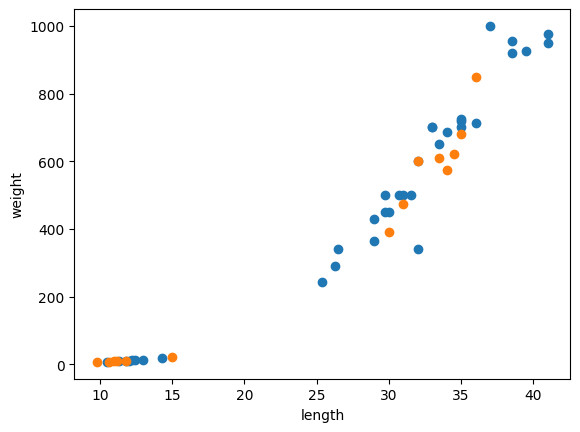

In [18]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트 ,테스트 세트에 도미 빙어가 잘 섞여있는 것을 확인 할 수 있다.

In [19]:
kn = kn.fit(train_input, train_target)

kn.score(test_input,test_target )

1.0

# 데이터 전처리

In [8]:
# 생선의 길이와, 무게 리스트 (도미 ,빙어)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight)) #나누는 함수

print(fish_data[:5])

fish_target = np.concatenate((np.ones(35), np.zeros(14))) #합치는 함수

print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)

#훈련세트와 테스트세트를 알아서 잘 나눠줌 기본적으로 25%를 테스트케이스로 뺌

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

# 완벽하게 분류함


1.0

In [14]:
print(kn.predict([[25, 150]])) # 도미로 예측하지 않음

[0.]


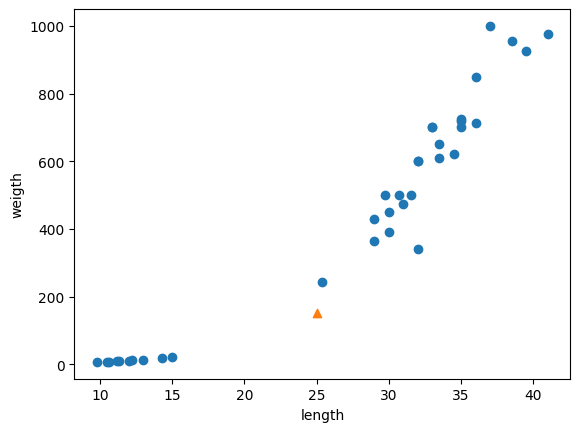

In [16]:
# 다른 데이터와 함께 산점도를 그려보자
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

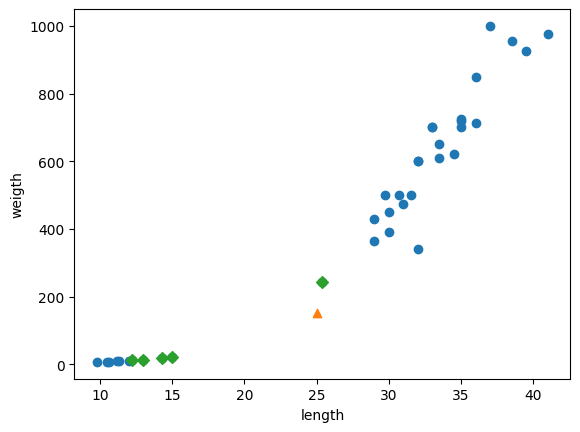

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [20]:
# 산점도를 보면 도미데이터에 가깝지만 기본적으로 5개의 이웃값을 토대로 비교한다

distances, indexes = kn.kneighbors([[25, 150]]) # 입력값과 가까이있는 이웃의 거리 index 값

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

# 가까운 샘플 값중 가장 가까운 5개의 샘플중 도미가 하나만 포함되어있다.
# 산점도를 보면 직관적으로 도미와 가까워보이는데 왜일까

print(train_input[indexes])
print(train_target[indexes])


#샘플과의 거리를 출력해보면 비율이 이상하다는 것을 알수있다.두 특성의 스케일이 다르기 때문
print(distances)



데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측 할 수 없다.
거리기반 알고리즘의 경우 특히 그렇다(k-최근접 이웃)

샘플 간의 거리에 영향을 많이 받기 때문에 제대로 사용하려면 특성값을 일정한 기준으로 맞춰줘야한다. (데이터 전처리)

전처리 방법 중 하나는 표준점수 이다.

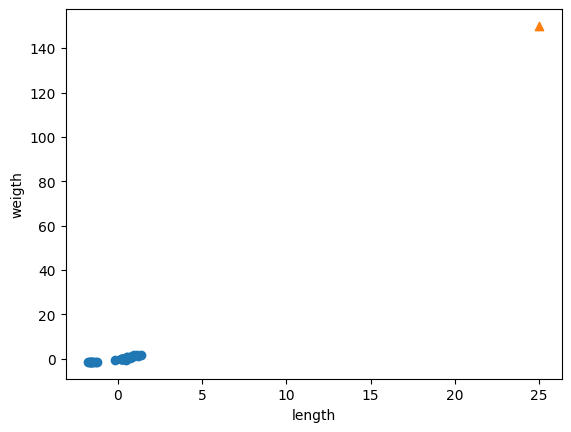

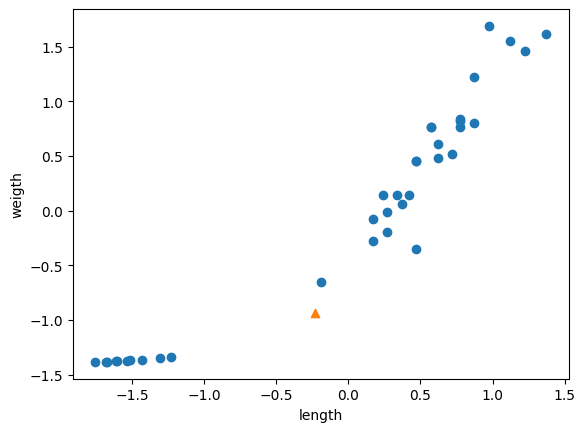

In [24]:
mean = np.mean(train_input, axis=0) # 평균계산
std = np.std(train_input, axis=0) # 표준편차 계산

train_scaled = (train_input - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

# 샘플도 동일한 비율로 변환해야한다.


new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()




In [25]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)



1.0

In [26]:
print(kn.predict([new])) # 도미 예측 성공

[1.]


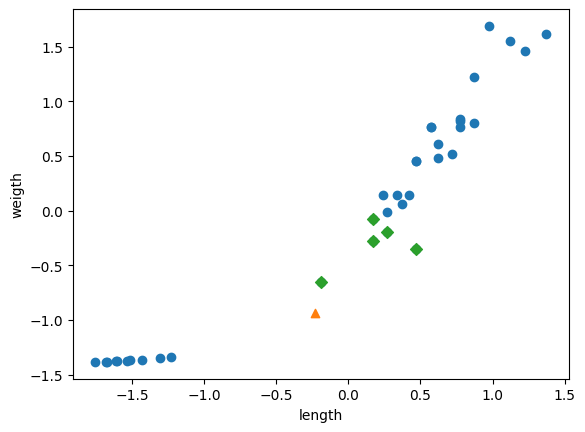

In [27]:
distances, indexes = kn.kneighbors([new]) # 입력값과 가까이있는 이웃의 거리 index 값

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()


# 가까운 샘플 값들이 도미로 바뀐 것을 확인 할 수 있다.